In [202]:
import numpy as np
import pandas as pd
import nltk as nlt
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [203]:
file_path = "../../data/processed/facebook_preprocessed/posts_by_blocks_of_days.json"

with open(file_path, "r", encoding="utf-8") as file:
    json_data = json.load(file)



In [204]:
# Add block index to each post
processed = []
for block_index, block in enumerate(json_data):
    for post in block:
        post['block_index'] = block_index  # You can also add a date range or tag
        processed.append(post)

# Create DataFrame
df = pd.DataFrame(processed)

# Optional: Create datetime column
df["datetime"] = pd.to_datetime(df["date"] + " " + df["time"])

# Now you can group by 'block_index' to get back the structure
df.head()

,post_id,title,date,time,score,num_comments,flair,combined_text,comments,block_index,datetime
0,1jfldi8,why is growing a facebook page 10x harder comp...,2025-03-20,10:00:13,1,8,Discussion,why is growing a facebook page 10x harder comp...,[],0,2025-03-20 10:00:13
1,1jfodcm,is there a facebook dupe like bluesky for x tw...,2025-03-20,13:01:23,23,32,Discussion,is there a facebook dupe like bluesky for x tw...,[],0,2025-03-20 13:01:23
2,1jfqmks,ive been receiving tens or hundreds of message...,2025-03-20,14:48:59,0,3,Tech Support,ive been receiving tens or hundreds of message...,[],0,2025-03-20 14:48:59
3,1jfsjpq,i got suspended within under twelve hours of b...,2025-03-20,16:12:33,27,71,Discussion,i got suspended within under twelve hours of b...,[],0,2025-03-20 16:12:33
4,1jftvc0,the old facebook is still in the servers and i...,2025-03-20,17:08:03,0,4,Discussion,the old facebook is still in the servers and i...,[],0,2025-03-20 17:08:03


# Sentiment over time

In [205]:
df['date'] = pd.to_datetime(df['date'])

# Group by date and sum the scores
daily_scores = df.groupby(df['date'].dt.date)['score'].sum().reset_index()

# Rename columns for clarity
daily_scores.columns = ['day', 'score']

print(daily_scores.head())


          day  score
0  2025-03-20    631
1  2025-03-21     73
2  2025-03-22    169
3  2025-03-23   1827
4  2025-03-24     95


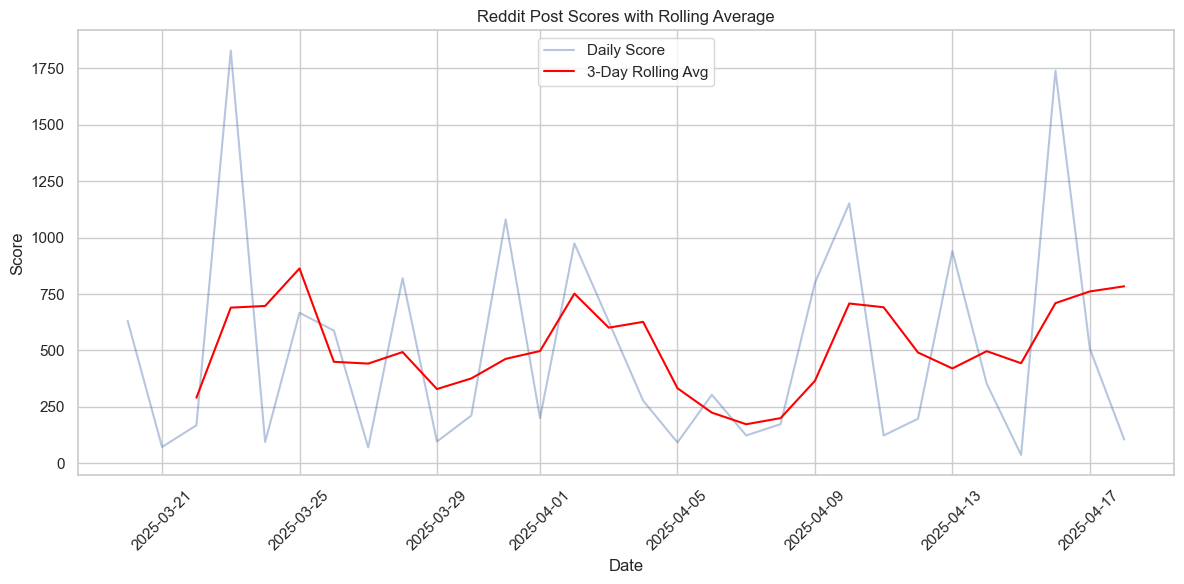

In [206]:
daily_scores['rolling_score'] = daily_scores['score'].rolling(window=3).mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_scores['day'], daily_scores['score'], alpha=0.4, label='Daily Score')
plt.plot(daily_scores['day'], daily_scores['rolling_score'], color='red', label='3-Day Rolling Avg')
plt.title("Reddit Post Scores with Rolling Average")
plt.xlabel("Date")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Text Based Analysis

In [207]:
text = df["combined_text"]

In [208]:
from collections import Counter
import re

# Total character counts per post
character_count = list(map(lambda x:len(x),text))

df["character_count"] = character_count

# Total word count per post
word_counts = list(map(lambda s: len(s.split()), text))
df["Word_count"] = word_counts

# Seperated Words from total list
words = [word.lower() for t in text for word in re.findall(r'\b\w+\b', t)]
# df["Sepeated_words"] = words

# Sepeated words PER list
words_per_list = []
for t in text:
    words_per_list.append([text.lower() for text in re.findall(r'\b\w+\b', t)])

df["Seperated_List"] = words_per_list

# Frequncy of words in the entire dataframe
word_freq_counts = Counter(words)

In [209]:
# nlt.download('stopwords',download_dir="/src/EDA")
df.head()

,post_id,title,date,time,score,num_comments,flair,combined_text,comments,block_index,datetime,character_count,Word_count,Seperated_List
0,1jfldi8,why is growing a facebook page 10x harder comp...,2025-03-20,10:00:13,1,8,Discussion,why is growing a facebook page 10x harder comp...,[],0,2025-03-20 10:00:13,258,45,"[why, is, growing, a, facebook, page, 10x, har..."
1,1jfodcm,is there a facebook dupe like bluesky for x tw...,2025-03-20,13:01:23,23,32,Discussion,is there a facebook dupe like bluesky for x tw...,[],0,2025-03-20 13:01:23,634,112,"[is, there, a, facebook, dupe, like, bluesky, ..."
2,1jfqmks,ive been receiving tens or hundreds of message...,2025-03-20,14:48:59,0,3,Tech Support,ive been receiving tens or hundreds of message...,[],0,2025-03-20 14:48:59,413,76,"[ive, been, receiving, tens, or, hundreds, of,..."
3,1jfsjpq,i got suspended within under twelve hours of b...,2025-03-20,16:12:33,27,71,Discussion,i got suspended within under twelve hours of b...,[],0,2025-03-20 16:12:33,483,101,"[i, got, suspended, within, under, twelve, hou..."
4,1jftvc0,the old facebook is still in the servers and i...,2025-03-20,17:08:03,0,4,Discussion,the old facebook is still in the servers and i...,[],0,2025-03-20 17:08:03,306,67,"[the, old, facebook, is, still, in, the, serve..."


In [210]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))  # Load English stopwords
words = [w for w in words if w not in stop_words]
print(words)
word_freq_counts = Counter(words)
most_common = word_freq_counts.most_common(20)  

common_words_df = pd.DataFrame(most_common, columns=['Word', 'Frequency'])
common_words_df.head()

['growing', 'facebook', 'page', '10x', 'harder', 'compared', 'platforms', 'current', 'page', 'strategy', 'using', 'groups', 'find', 'potential', 'customers', 'might', 'interested', 'services', 'im', 'wondering', 'im', 'better', 'creating', 'group', 'instead', 'page', 'facebook', 'dupe', 'like', 'bluesky', 'x', 'twitter', 'tired', 'misinformation', 'scams', 'used', 'love', 'facebook', 'misinformation', 'constant', 'spamscams', 'really', 'degraded', 'application', 'tired', 'people', 'spewing', 'ignorance', 'without', 'fact', 'checking', 'blatantly', 'ignoring', 'reputable', 'statistics', 'sources', 'currently', 'using', 'facebook', 'marketplace', 'many', 'scams', 'spams', 'nowadays', 'also', 'use', 'poshmark', 'depot', 'etc', 'theres', 'certain', 'demographic', 'thats', 'facebook', 'dont', 'want', 'part', 'also', 'really', 'hate', 'mark', 'zuckerberg', 'think', 'hes', 'pos', 'ive', 'receiving', 'tens', 'hundreds', 'messages', 'facebook', 'pages', 'ive', 'received', 'many', 'messages', 'f

,Word,Frequency
0,facebook,553
1,account,362
2,im,165
3,get,136
4,like,119


In [211]:
from nltk.util import ngrams

# Generate unigrams, bigrams, trigrams
unigrams = list(ngrams(words, 1))
bigrams = list(ngrams(words, 2))
trigrams = list(ngrams(words, 3))

# Count most common n-grams

grams_df = pd.DataFrame()
grams_df["bigrams"] = Counter(bigrams).most_common(20)
grams_df["trigrams"] = Counter(trigrams).most_common(20)
grams_df.head()


,bigrams,trigrams
0,"((facebook, account), 59)","((people, may, know), 8)"
1,"((anyone, else), 27)","((make, new, account), 6)"
2,"((new, account), 22)","((facebook, account, suspended), 6)"
3,"((dont, know), 19)","((dont, even, know), 5)"
4,"((phone, number), 18)","((would, greatly, appreciated), 4)"


In [212]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

sent = df['combined_text'].apply(lambda post: sia.polarity_scores(post)['compound'])
df["Sentiment"] = sent
print(sent)

0      0.8176
1     -0.9863
2      0.3847
3     -0.3315
4      0.5349
        ...  
316   -0.8745
317   -0.9422
318   -0.5994
319   -0.1280
320   -0.8382
Name: combined_text, Length: 321, dtype: float64


In [213]:
df.head()

,post_id,title,date,time,score,num_comments,flair,combined_text,comments,block_index,datetime,character_count,Word_count,Seperated_List,Sentiment
0,1jfldi8,why is growing a facebook page 10x harder comp...,2025-03-20,10:00:13,1,8,Discussion,why is growing a facebook page 10x harder comp...,[],0,2025-03-20 10:00:13,258,45,"[why, is, growing, a, facebook, page, 10x, har...",0.8176
1,1jfodcm,is there a facebook dupe like bluesky for x tw...,2025-03-20,13:01:23,23,32,Discussion,is there a facebook dupe like bluesky for x tw...,[],0,2025-03-20 13:01:23,634,112,"[is, there, a, facebook, dupe, like, bluesky, ...",-0.9863
2,1jfqmks,ive been receiving tens or hundreds of message...,2025-03-20,14:48:59,0,3,Tech Support,ive been receiving tens or hundreds of message...,[],0,2025-03-20 14:48:59,413,76,"[ive, been, receiving, tens, or, hundreds, of,...",0.3847
3,1jfsjpq,i got suspended within under twelve hours of b...,2025-03-20,16:12:33,27,71,Discussion,i got suspended within under twelve hours of b...,[],0,2025-03-20 16:12:33,483,101,"[i, got, suspended, within, under, twelve, hou...",-0.3315
4,1jftvc0,the old facebook is still in the servers and i...,2025-03-20,17:08:03,0,4,Discussion,the old facebook is still in the servers and i...,[],0,2025-03-20 17:08:03,306,67,"[the, old, facebook, is, still, in, the, serve...",0.5349


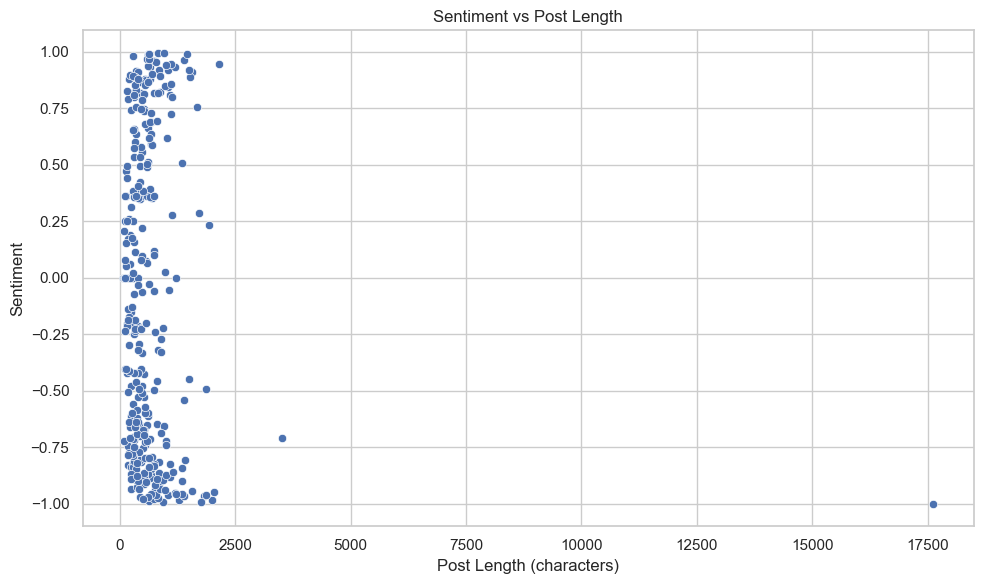

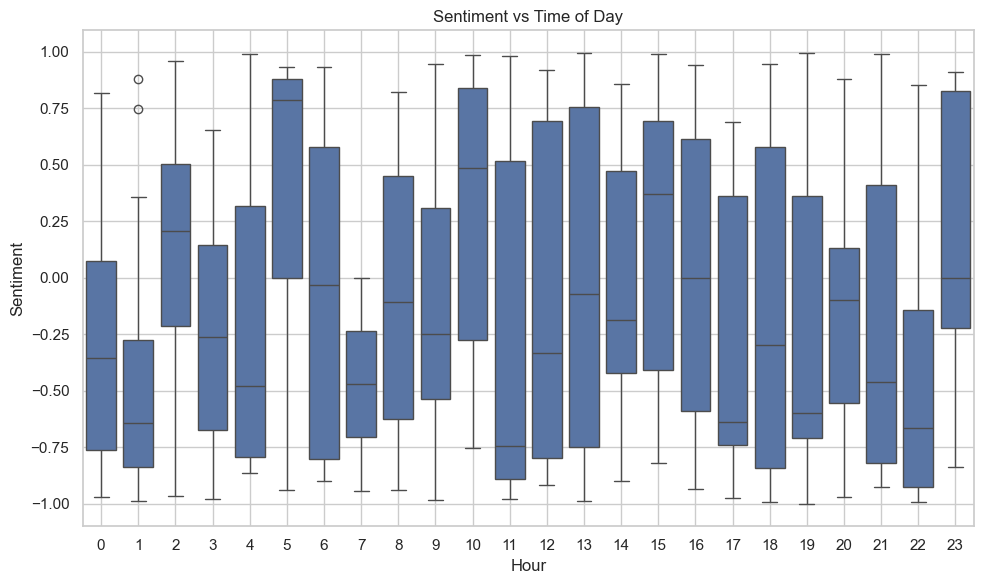

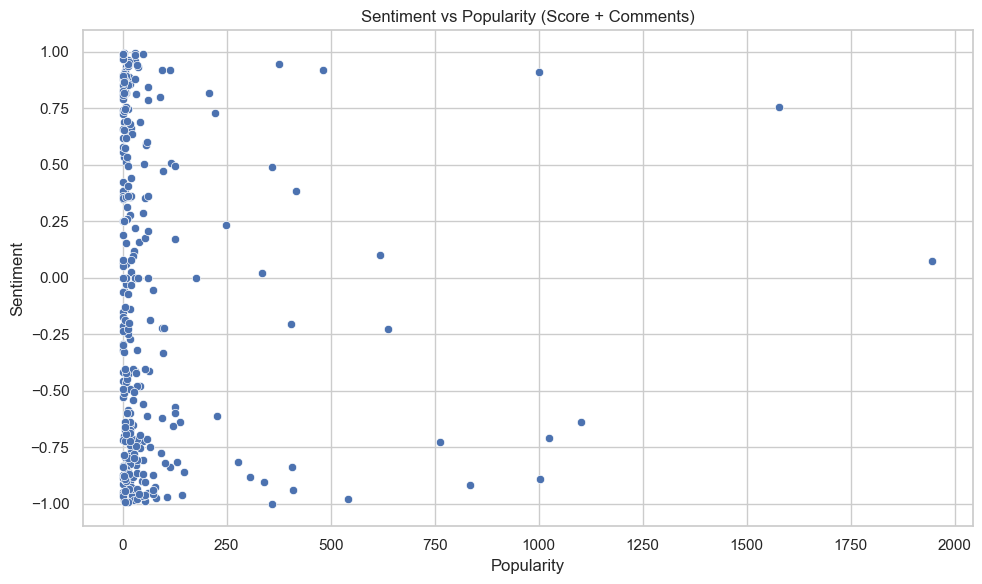


=== Correlations ===
             post_length      hour  popularity  Sentiment
post_length     1.000000  0.051607    0.166582  -0.079659
hour            0.051607  1.000000    0.121800  -0.022435
popularity      0.166582  0.121800    1.000000  -0.043015
Sentiment      -0.079659 -0.022435   -0.043015   1.000000


In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure these columns exist — adjust as needed
if 'body' not in df.columns and 'combined_text' in df.columns:
    df['body'] = df['combined_text']

# Create post length column
df['post_length'] = df['body'].apply(len)

# Extract hour from the 'time' column
df['hour'] = pd.to_datetime(df['time'], format='%H:%M:%S', errors='coerce').dt.hour

# Compute popularity metric
df['popularity'] = df['score'] + df['num_comments']

# --- Plot: Sentiment vs Post Length ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='post_length', y='Sentiment')
plt.title('Sentiment vs Post Length')
plt.xlabel('Post Length (characters)')
plt.ylabel('Sentiment')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot: Sentiment vs Hour of Day ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='hour', y='Sentiment')
plt.title('Sentiment vs Time of Day')
plt.xlabel('Hour')
plt.ylabel('Sentiment')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plot: Sentiment vs Popularity ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='popularity', y='Sentiment')
plt.title('Sentiment vs Popularity (Score + Comments)')
plt.xlabel('Popularity')
plt.ylabel('Sentiment')
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Correlation Analysis ---
correlations = df[['post_length', 'hour', 'popularity', 'Sentiment']].corr()
print("\n=== Correlations ===")
print(correlations)


In [215]:
relevant_columns = ['date', 'score', 'num_comments', 'flair','character_count','Word_count', 'Sentiment','post_length','hour', "popularity","block_index"]
new_df = df[relevant_columns]
new_df.head()

,date,score,num_comments,flair,character_count,Word_count,Sentiment,post_length,hour,popularity,block_index
0,2025-03-20,1,8,Discussion,258,45,0.8176,258,10,9,0
1,2025-03-20,23,32,Discussion,634,112,-0.9863,634,13,55,0
2,2025-03-20,0,3,Tech Support,413,76,0.3847,413,14,3,0
3,2025-03-20,27,71,Discussion,483,101,-0.3315,483,16,98,0
4,2025-03-20,0,4,Discussion,306,67,0.5349,306,17,4,0


In [216]:
sentiment_vs_date = new_df[['date', 'Sentiment']]

# Filter for year 2025
sentiment_vs_date_2025 = sentiment_vs_date[sentiment_vs_date['date'].dt.year == 2025]


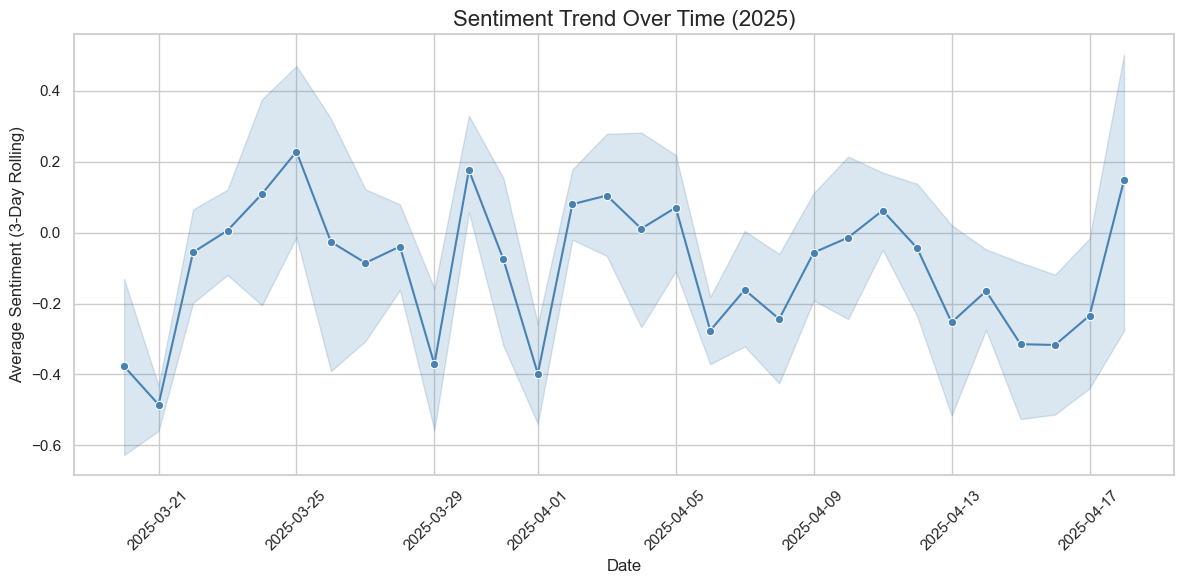

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by date
sentiment_vs_date_2025 = sentiment_vs_date_2025.sort_values("date")

# Apply a 3-day rolling average for smoothing
sentiment_vs_date_2025['Smoothed Sentiment'] = sentiment_vs_date_2025['Sentiment'].rolling(window=3).mean()

# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=sentiment_vs_date_2025, x='date', y='Smoothed Sentiment', marker='o', color='steelblue')
plt.title('Sentiment Trend Over Time (2025)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Average Sentiment (3-Day Rolling)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [218]:
new_df.head()

,date,score,num_comments,flair,character_count,Word_count,Sentiment,post_length,hour,popularity,block_index
0,2025-03-20,1,8,Discussion,258,45,0.8176,258,10,9,0
1,2025-03-20,23,32,Discussion,634,112,-0.9863,634,13,55,0
2,2025-03-20,0,3,Tech Support,413,76,0.3847,413,14,3,0
3,2025-03-20,27,71,Discussion,483,101,-0.3315,483,16,98,0
4,2025-03-20,0,4,Discussion,306,67,0.5349,306,17,4,0


In [219]:
new_df.head()

,date,score,num_comments,flair,character_count,Word_count,Sentiment,post_length,hour,popularity,block_index
0,2025-03-20,1,8,Discussion,258,45,0.8176,258,10,9,0
1,2025-03-20,23,32,Discussion,634,112,-0.9863,634,13,55,0
2,2025-03-20,0,3,Tech Support,413,76,0.3847,413,14,3,0
3,2025-03-20,27,71,Discussion,483,101,-0.3315,483,16,98,0
4,2025-03-20,0,4,Discussion,306,67,0.5349,306,17,4,0


C:\Users\Bibidh Subedi\AppData\Local\Temp\ipykernel_3876\1976947238.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=block_counts.index, y=block_counts.values, palette="viridis")


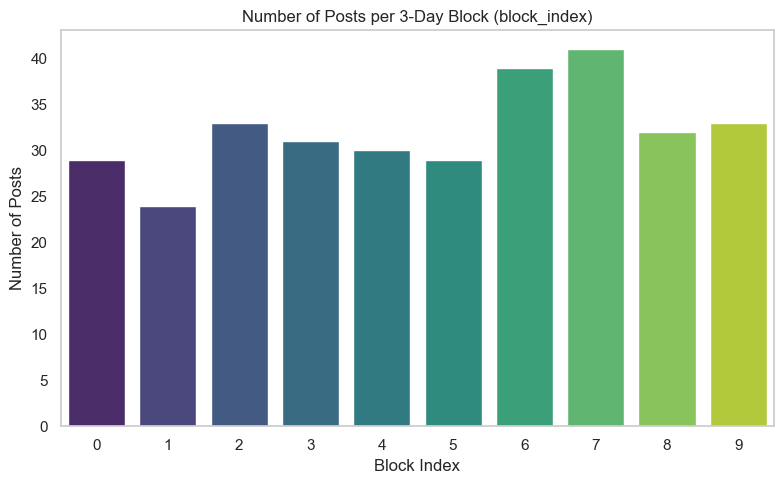

In [220]:

# Count how many posts are in each block
block_counts = df['block_index'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=block_counts.index, y=block_counts.values, palette="viridis")
plt.title("Number of Posts per 3-Day Block (block_index)")
plt.xlabel("Block Index")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.grid(axis='y')
plt.show()


In [221]:
grouped = new_df.groupby('block_index')
grouped.head()

,date,score,num_comments,flair,character_count,Word_count,Sentiment,post_length,hour,popularity,block_index
0,2025-03-20,1,8,Discussion,258,45,0.8176,258,10,9,0
1,2025-03-20,23,32,Discussion,634,112,-0.9863,634,13,55,0
2,2025-03-20,0,3,Tech Support,413,76,0.3847,413,14,3,0
3,2025-03-20,27,71,Discussion,483,101,-0.3315,483,16,98,0
4,2025-03-20,0,4,Discussion,306,67,0.5349,306,17,4,0
29,2025-03-23,0,6,Discussion,746,142,0.8176,746,5,6,1
30,2025-03-23,230,179,Discussion,764,150,-0.9406,764,7,409,1
31,2025-03-23,60,65,Tech Support,450,86,0.4939,450,8,125,1
32,2025-03-23,0,6,Disabled/hacked,649,126,0.3921,649,13,6,1
33,2025-03-23,23,74,Disabled/hacked,143,27,0.4717,143,18,97,1


In [222]:


stop_words = set(stopwords.words('english'))


exportDF = pd.DataFrame()
exportDF['date'] = grouped['date'].first().values        # Date of first post in the block
exportDF['company'] = 'Facebook'                          
exportDF['avg_sentiment'] = grouped['Sentiment'].mean().values
exportDF['num_comments'] = grouped['num_comments'].sum().values
exportDF['num_posts'] = grouped.size().values             # Number of rows in each group


exportDF.head()

,date,company,avg_sentiment,num_comments,num_posts
0,2025-03-20,Facebook,-0.261103,669,29
1,2025-03-23,Facebook,0.109408,1552,24
2,2025-03-26,Facebook,-0.064558,914,33
3,2025-03-29,Facebook,-0.130084,982,31
4,2025-04-01,Facebook,-0.048890,805,30


In [223]:
common_words_df.head()

,Word,Frequency
0,facebook,553
1,account,362
2,im,165
3,get,136
4,like,119


In [ ]:
import os
import json

# Define path
path = "../../data/PostEDA"
processed_dir = path
os.makedirs(processed_dir, exist_ok=True)

# Convert date columns to string (ISO format)
exportDF_serializable = exportDF.copy()
exportDF_serializable['date'] = exportDF_serializable['date'].astype(str)

common_words_serializable = common_words_df.copy()
if 'date' in common_words_serializable.columns:
    common_words_serializable['date'] = common_words_serializable['date'].astype(str)

# Dump exportDF
with open(os.path.join(processed_dir, 'FacebookExport.json'), 'w') as f:
    json.dump(exportDF_serializable.to_dict(orient='records'), f, indent=2)

# Dump common_words_df
with open(os.path.join(processed_dir, 'FacebookCommonWords.json'), 'w') as f:
    json.dump(common_words_serializable.to_dict(orient='records'), f, indent=2)
